In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from src.data.project1.dataloader import get_loaders
from src.utils import invertNormalization

ModuleNotFoundError: No module named 'src.data.utils'

## Get dataloaders

In [50]:
loaders = get_loaders('/dtu/datasets1/02514/hotdog_nothotdog', batch_size=64, seed=0)

Computing mean of training split...: 100%|█| 1638/1638 [00:06<00:00, 245.15
Computing std. dev. of training split...: 100%|█| 1638/1638 [00:08<00:00, 1


Mean: tensor([0.5132, 0.4369, 0.3576])
Std. dev.: tensor([0.0214, 0.0208, 0.0223])


In [48]:
# Extract loaders
trainloader = loaders['train']
valloader   = loaders['validation']
testloader  = loaders['test']

## Visualize examples

In [62]:
# Get example batch
batch, targets = next(iter(trainloader)) 

In [76]:
def visualize_examples(batch, targets, title):
    
    train_mean  = [0.5132, 0.4369, 0.3576]
    train_std   = [0.0214, 0.0208, 0.0223]

    inverseNormalization = invertNormalization(train_mean=train_mean, train_std=train_std)
    data                 = inverseNormalization(batch).clamp(0, 1)

    class2idx = trainloader.dataset.dataset.class_to_idx
    idx2class = {v: k for k, v in class2idx.items()}

    fig, axs = plt.subplots(3, 10, figsize=(18, 5))

    for i in range(10):
        axs[0, i].imshow(data[i].permute(1,2,0))
        axs[1, i].imshow(data[i+10].permute(1,2,0))
        axs[2, i].imshow(data[i+20].permute(1,2,0))

        axs[0, i].set_title(idx2class[targets[i].item()])
        axs[1, i].set_title(idx2class[targets[i+10].item()])
        axs[2, i].set_title(idx2class[targets[i+20].item()])

        axs[0, i].axis('off')
        axs[1, i].axis('off')
        axs[2, i].axis('off')

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

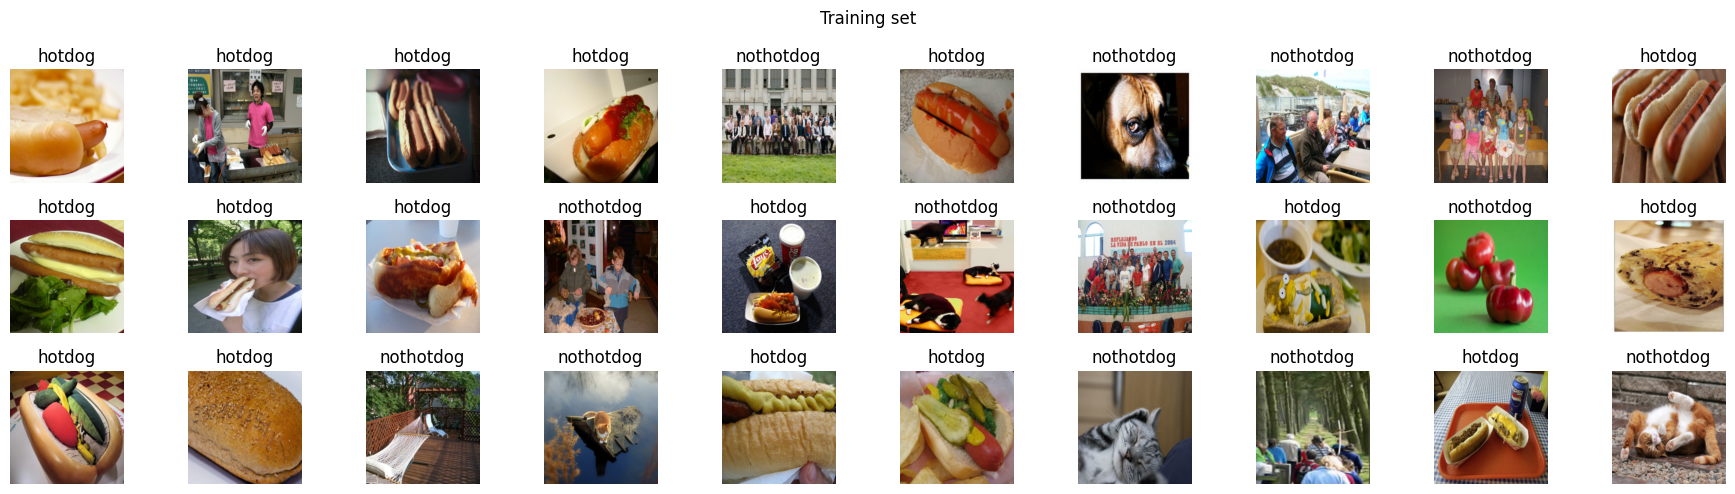

In [75]:
visualize_examples(data, targets, "Training set")